In [240]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [241]:
titanic =pd.read_csv("./Titanic-Dataset.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [242]:
titanic.drop(['PassengerId', 'Name', 'Cabin'], axis=1, inplace=True)

In [243]:
null_age_count = titanic['Age'].isnull().sum()
null_fare_count = titanic['Fare'].isnull().sum()
print(null_age_count)
print(null_fare_count)

177
0


In [244]:
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

In [245]:
print(titanic['Embarked'].value_counts(dropna=False))

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64


In [246]:
titanic_copy= titanic.copy()


In [247]:
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})

In [248]:
titanic['Embarked'] = titanic['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [249]:
titanic.corr(numeric_only=True)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307,0.108669
Pclass,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500,0.043835
Sex,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333,0.118593
Age,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067,0.012186
SibSp,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651,-0.060606
Parch,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225,-0.079320
Fare,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000,0.063462
Embarked,0.108669,0.043835,0.118593,0.012186,-0.060606,-0.079320,0.063462,1.000000


In [250]:
titanic['Fare_bin'] = pd.qcut(titanic['Fare'], q=4, duplicates='drop')

# 2. Compute the grouped median age
# Grouped median first
grouped_median = titanic.groupby(
    ['Pclass', 'SibSp', 'Parch', 'Fare_bin'],
    observed=True
)['Age'].median()

# Fill using grouped median, then fill leftovers with overall median
def fill_age(row):
    if pd.isnull(row['Age']):
        key = (row['Pclass'], row['SibSp'], row['Parch'], row['Fare_bin'])
        return grouped_median.get(key, titanic['Age'].median())
    else:
        return row['Age']

titanic['Age'] = titanic.apply(fill_age, axis=1)


In [251]:
titanic.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         14
SibSp        0
Parch        0
Ticket       0
Fare         0
Embarked     2
Fare_bin     0
dtype: int64

In [252]:
null_age_rows = titanic[titanic['Age'].isnull()]
print(null_age_rows)

     Survived  Pclass  Sex  Age  SibSp  Parch    Ticket   Fare  Embarked  \
159         0       3    0  NaN      8      2  CA. 2343  69.55       0.0   
180         0       3    1  NaN      8      2  CA. 2343  69.55       0.0   
201         0       3    0  NaN      8      2  CA. 2343  69.55       0.0   
277         0       2    0  NaN      0      0    239853   0.00       0.0   
324         0       3    0  NaN      8      2  CA. 2343  69.55       0.0   
413         0       2    0  NaN      0      0    239853   0.00       0.0   
466         0       2    0  NaN      0      0    239853   0.00       0.0   
481         0       2    0  NaN      0      0    239854   0.00       0.0   
593         0       3    1  NaN      0      2    364848   7.75       2.0   
674         0       2    0  NaN      0      0    239856   0.00       0.0   
732         0       2    0  NaN      0      0    239855   0.00       0.0   
792         0       3    1  NaN      8      2  CA. 2343  69.55       0.0   
846         

In [253]:
titanic[titanic['Ticket'] == 'CA. 2343']

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_bin
159,0,3,0,NaN,8,2,CA. 2343,69.55,0.0,"(31.0, 512.329]"
180,0,3,1,NaN,8,2,CA. 2343,69.55,0.0,"(31.0, 512.329]"
201,0,3,0,NaN,8,2,CA. 2343,69.55,0.0,"(31.0, 512.329]"
324,0,3,0,NaN,8,2,CA. 2343,69.55,0.0,"(31.0, 512.329]"
792,0,3,1,NaN,8,2,CA. 2343,69.55,0.0,"(31.0, 512.329]"
846,0,3,0,NaN,8,2,CA. 2343,69.55,0.0,"(31.0, 512.329]"
863,0,3,1,NaN,8,2,CA. 2343,69.55,0.0,"(31.0, 512.329]"


In [254]:
#as per the patterns,Rows with ticket CA. 2343, Pclass=3, SibSp=8, Parch=2, Fare=69.55, and mostly Embarked=0.0,
#it means spouses most probably cannot be 8 so siblings are 8 and parents are 2 and they can be of same family hence there age
#could be estimated near around 12
#rest average accordin to other details is near about 33.
titanic.loc[titanic['Ticket'] == 'CA. 2343', 'Age'] = 12
# Fill Age nulls with 33
titanic['Age'] = titanic['Age'].fillna(33)

# Fill Embarked nulls with 0 (assuming 'S' = 0)
titanic['Embarked'] = titanic['Embarked'].fillna(0)


In [255]:
# Drop non-numeric or irrelevant columns
titanic = titanic.drop(['PassengerId', 'Name', 'Cabin'], axis=1, errors='ignore')


In [256]:
# Convert Age and Embarked to int64
titanic['Age'] = titanic['Age'].astype('int')
titanic['Embarked'] = titanic['Embarked'].astype('int')

# Drop the Fare_bin column
titanic = titanic.drop(columns=['Fare_bin'], errors='ignore')


In [257]:
print(titanic.dtypes)

Survived      int64
Pclass        int64
Sex           int64
Age           int64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked      int64
dtype: object


In [258]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,0,22,1,0,A/5 21171,7.2500,0
1,1,1,1,38,1,0,PC 17599,71.2833,1
2,1,3,1,26,0,0,STON/O2. 3101282,7.9250,0
3,1,1,1,35,1,0,113803,53.1000,0
4,0,3,0,35,0,0,373450,8.0500,0


In [259]:
titanic= titanic.drop(columns=['Ticket'], axis=1)

In [260]:
titanic.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,0.543351,-0.039994,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.338481,1.000000,-0.131900,-0.411795,0.083081,0.018443,-0.549500,0.045702
Sex,0.543351,-0.131900,1.000000,-0.094572,0.114631,0.245489,0.182333,0.116569
Age,-0.039994,-0.411795,-0.094572,1.000000,-0.310775,-0.201632,0.107890,-0.028077
SibSp,-0.035322,0.083081,0.114631,-0.310775,1.000000,0.414838,0.159651,-0.059961
Parch,0.081629,0.018443,0.245489,-0.201632,0.414838,1.000000,0.216225,-0.078665
Fare,0.257307,-0.549500,0.182333,0.107890,0.159651,0.216225,1.000000,0.062142
Embarked,0.106811,0.045702,0.116569,-0.028077,-0.059961,-0.078665,0.062142,1.000000


In [261]:
'''From this we got to know that survival depended on the age. that is the females survived more, who paid higher also 
survived more and who were in higer class in ship survived'''

'From this we got to know that survival depended on the age. that is the females survived more, who paid higher also \nsurvived more and who were in higer class in ship survived'

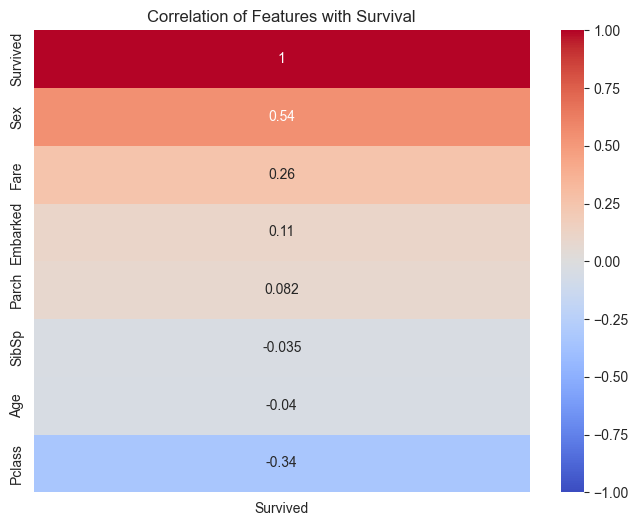

In [263]:
features = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Correlation matrix
corr = titanic[features].corr()

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(corr[['Survived']].sort_values(by='Survived', ascending=False), 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Correlation of Features with Survival')
plt.show()


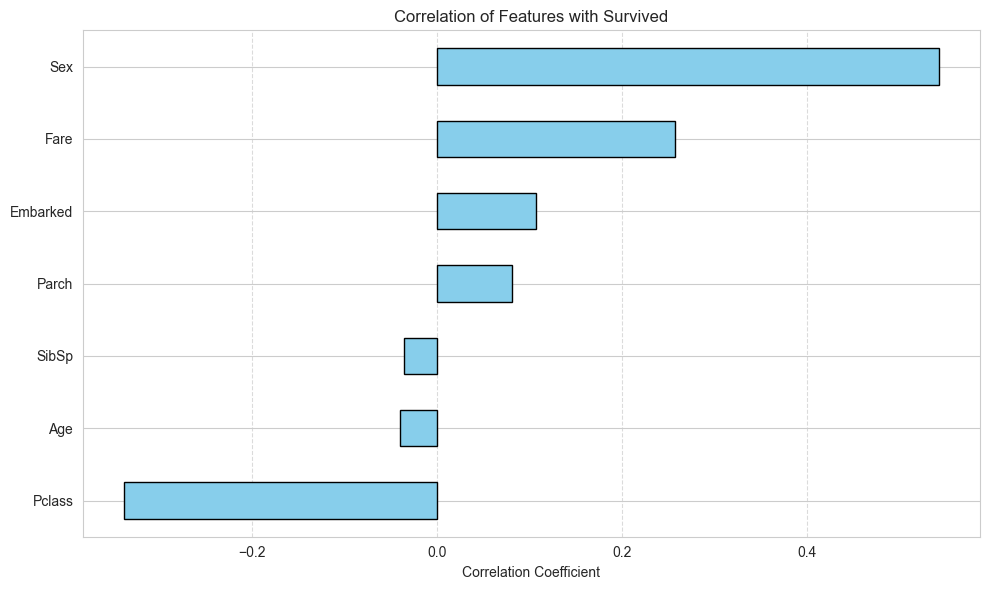

In [264]:
import pandas as pd
import matplotlib.pyplot as plt

# Columns you want to analyze
features = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Drop NaNs to avoid errors
titanic_corr = titanic[features].dropna()

# Compute correlation with Survived
corr_with_survived = titanic_corr.corr()['Survived'].drop('Survived')

# Plot bar chart
plt.figure(figsize=(10, 6))
corr_with_survived.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')

plt.title('Correlation of Features with Survived')
plt.xlabel('Correlation Coefficient')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
